In [44]:
import pandas as pd

#Read dataset CSV
#train = pd.read_csv("C:/Users/Thad/Projects/cos-472-course-project/data/cleaned.csv")
train = pd.read_csv("C:/Users/Thad/Projects/cos-472-course-project/data/cleaned.csv")


In [45]:
#Split to x and y sets
x = train.drop(['sii'], axis=1)
x.info()
y = train['sii']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 74 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               2736 non-null   int64  
 1   Basic_Demos-Age                         2736 non-null   int64  
 2   Basic_Demos-Sex                         2736 non-null   int64  
 3   CGAS-Season                             2736 non-null   int64  
 4   CGAS-CGAS_Score                         2736 non-null   int64  
 5   Physical-Season                         2736 non-null   int64  
 6   Physical-BMI                            2736 non-null   int64  
 7   Physical-Height                         2736 non-null   int64  
 8   Physical-Weight                         2736 non-null   int64  
 9   Physical-Diastolic_BP                   2736 non-null   int64  
 10  Physical-HeartRate                      2736 non-null   int6

In [46]:
from sklearn.model_selection import train_test_split

#Train/test splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 175, max_depth=8, max_features= 'log2')  
 
# Training the model
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=175)

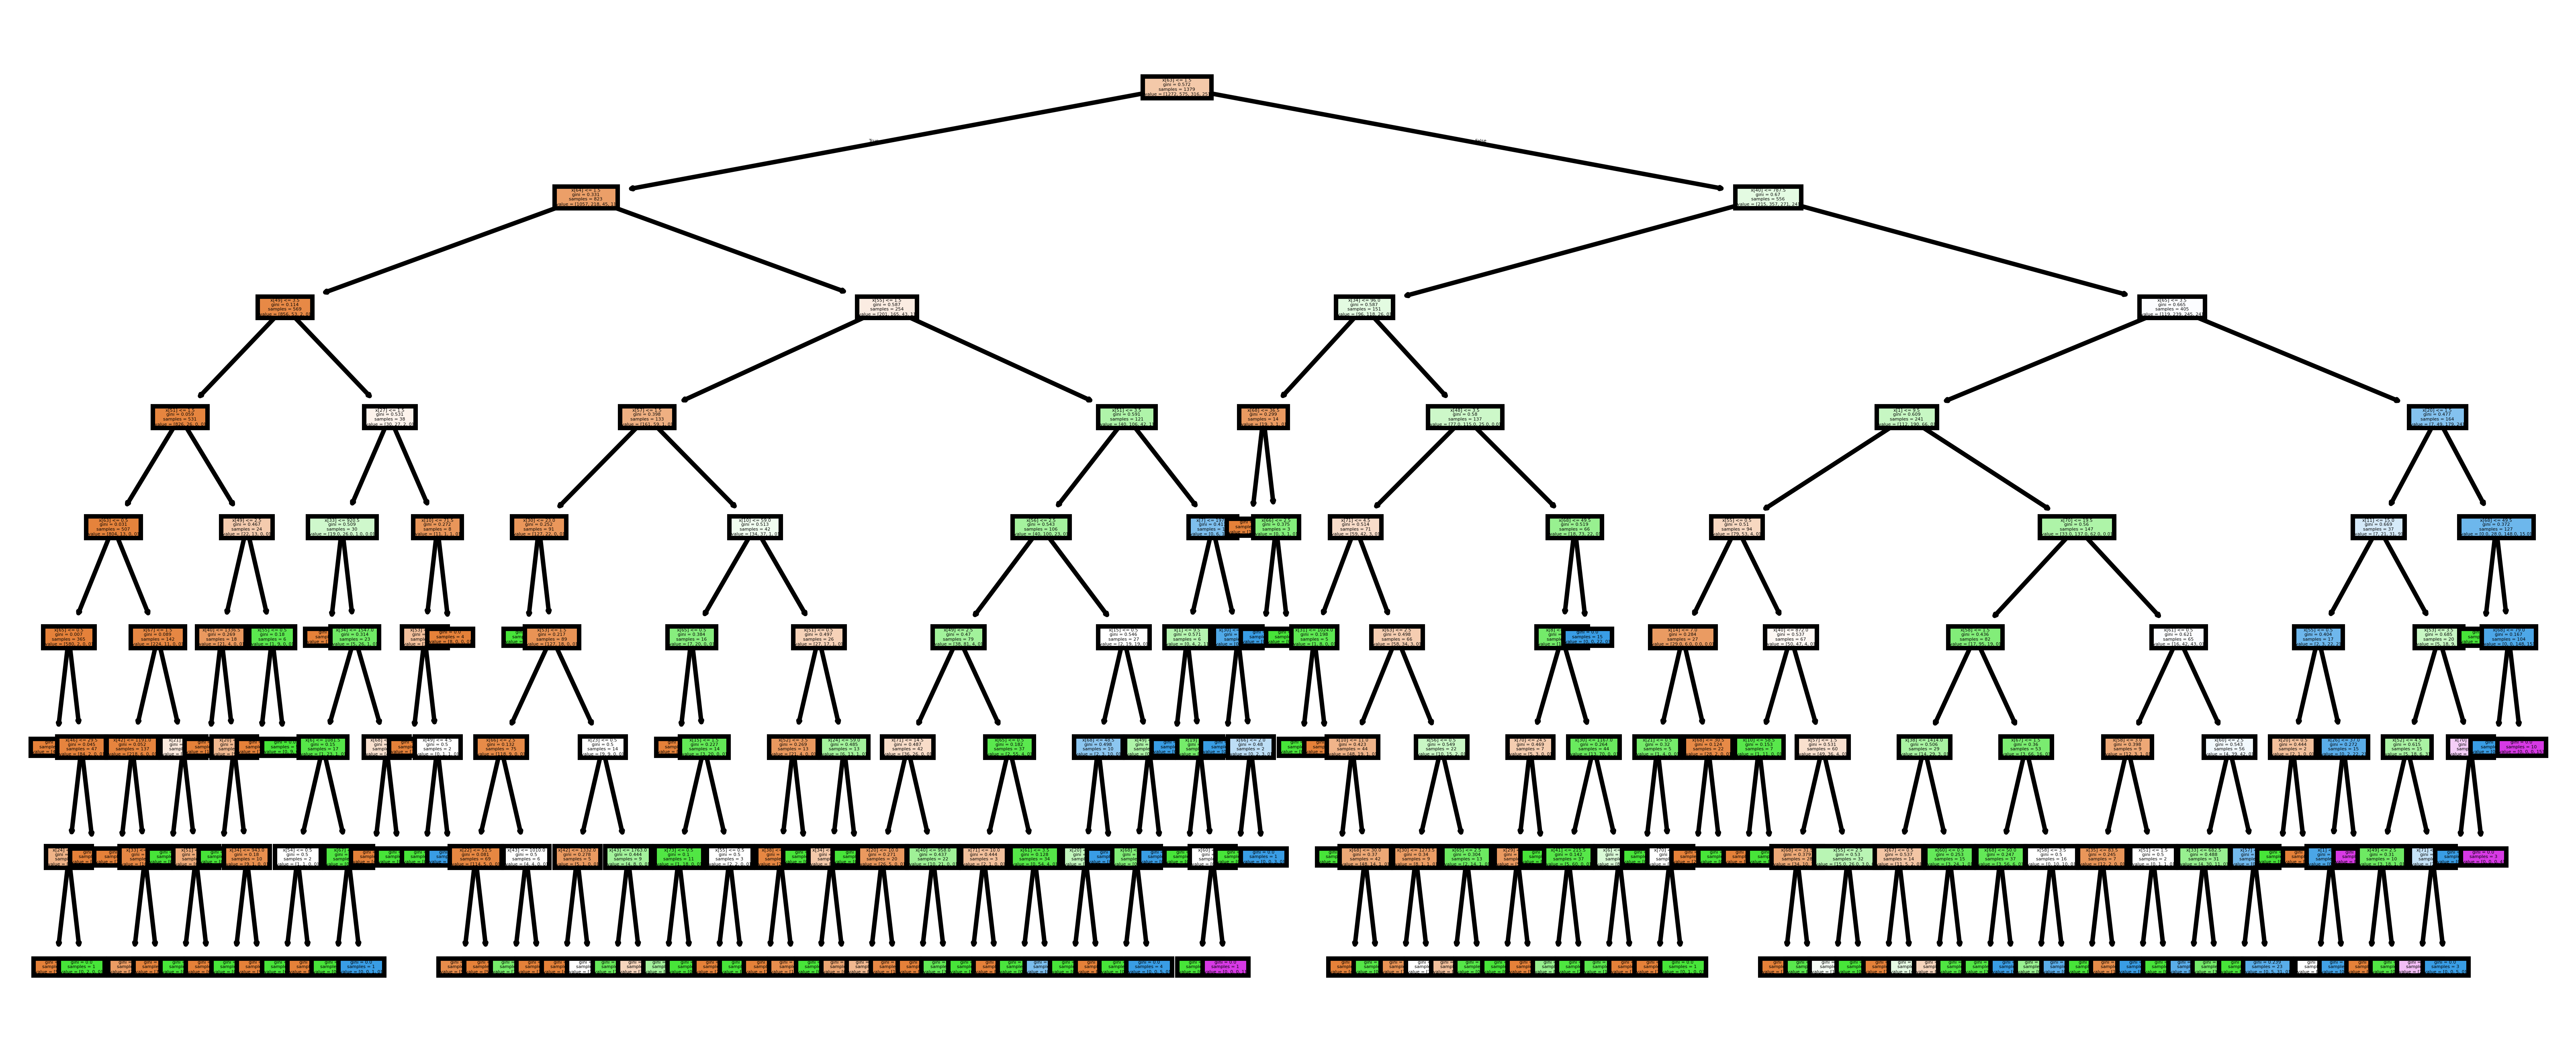

In [48]:
import matplotlib.pyplot as plt
from sklearn import tree

fn='data.feature_names'
cn='data.target_names'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
          
               filled = True);
fig.savefig('rf_individualtree.png')

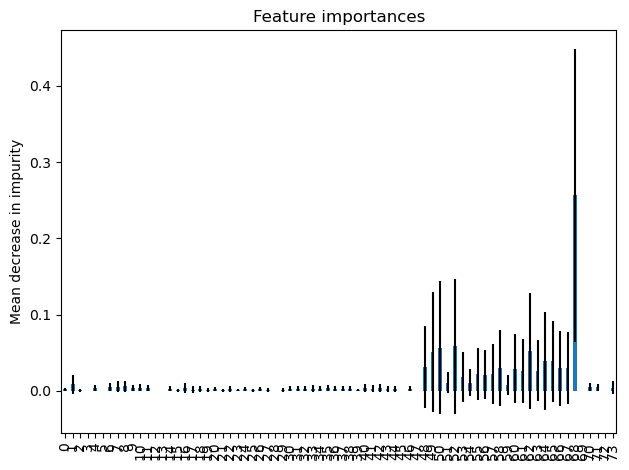

In [49]:
import numpy as np

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [50]:
from sklearn.metrics import log_loss, roc_auc_score, roc_curve

test_y_hat=clf.predict_proba(x_test)
naive_test_log_loss=log_loss(y_test, test_y_hat[:,1])
naive_test_roc_auc=roc_auc_score(y_test, test_y_hat[:,1])

test_fpr, test_tpr, test_thresholds = roc_curve(y_true=y_test, y_score=test_y_hat[:,1])

plt.plot(test_fpr, test_tpr, label='Test ROC AUC')
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC AUC Curve For Random Forest trained on the Titanic dataset')
plt.show()

ValueError: y_true and y_pred contain different number of classes 4, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [0. 1. 2. 3.]

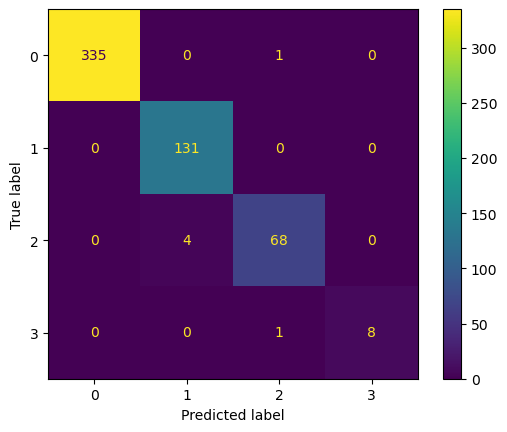

In [ ]:
#Confusion matrix
from sklearn import metrics

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

pred = clf.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3])

cm_display.plot()
plt.show()

In [52]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average=None)

array([0.99850969, 0.98496241, 0.95774648, 0.94117647])